### Python Text Mining- Sentiment Analysis - Naive Bayes MultinomialNB -  Top 20 News Groups Data Set


Problem Statement: How do we predict the relationship between an unseen document of sentences to a news topic for which it belongs to?

### Import the text data

In [2]:
#imports the news group dataset
from sklearn.datasets import fetch_20newsgroups
cats= ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
data_train = fetch_20newsgroups(subset='train',categories=cats, shuffle=True, random_state=50)
import

In [8]:
#function to compute the length of the date attribute
len(data_train.data)

2257

### Visualize the Target Variable

In [7]:
#prints out the target categories/topics for analysis
data_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

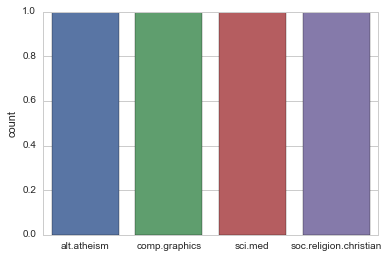

In [12]:
#Visual representation of the text features
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
sns.countplot(x="target_names", data=data_train)

### Preprocessing: Retrieving text features from the file corpus

#### 1. Count Vectorizer

In [13]:
#creates a vector with the count of words in the entire document
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data_train.data)
X_train_counts.shape

(2257, 35788)

#### 2. Count the number of occurrencies of terms within the text

In [18]:
#This will tokenize the corpus and return the sparse matrix. 
#From here, we'll be able to perform analyses involving word frequency.
from sklearn.feature_extraction.text import TfidfTransformer
termf_trans = TfidfTransformer(use_idf= False).fit(X_train_counts)
X_train_termf = termf_trans.transform(X_train_counts)
print(X_train_termf)

  (0, 26741)	0.160128153805
  (0, 15699)	0.160128153805
  (0, 31106)	0.160128153805
  (0, 28469)	0.160128153805
  (0, 22255)	0.160128153805
  (0, 13255)	0.160128153805
  (0, 9183)	0.32025630761
  (0, 21362)	0.160128153805
  (0, 25777)	0.160128153805
  (0, 23610)	0.160128153805
  (0, 18044)	0.160128153805
  (0, 23915)	0.160128153805
  (0, 32493)	0.160128153805
  (0, 27664)	0.160128153805
  (0, 20253)	0.160128153805
  (0, 30414)	0.160128153805
  (0, 32142)	0.160128153805
  (0, 23733)	0.160128153805
  (0, 12225)	0.160128153805
  (0, 5797)	0.160128153805
  (0, 31077)	0.160128153805
  (0, 31060)	0.32025630761
  (0, 18401)	0.32025630761
  (0, 34556)	0.32025630761
  (0, 34557)	0.160128153805
  :	:
  (2256, 22541)	0.113227703414
  (2256, 32417)	0.113227703414
  (2256, 9338)	0.113227703414
  (2256, 16216)	0.113227703414
  (2256, 31034)	0.113227703414
  (2256, 34982)	0.113227703414
  (2256, 7766)	0.113227703414
  (2256, 32138)	0.113227703414
  (2256, 21322)	0.113227703414
  (2256, 23741)	0.11322

### Machine Learning Model: Naive Bayes MultinomialNB

Train a text classifier to predict the post topic i.e is the post related to science/medicine, religion or comp.graphics etc 

#### Naive Bayes MultinomialNB

Naïve Bayes uses data about prior events to estimate the probability of future events.
For instance, a common application of Naïve Bayes uses the frequency of words in past junk email messages to identify new junk mail.

Classifiers based on Bayesian methods utilize training data to calculate an observed probability of each class based on feature values.

When the classifier is used later on unlabeled data, it uses the observed probabilities to predict the most likely class for the new features.

In [20]:
#import the Multinomial Naive Bayes function
#creates and fits the model to the term frequency matrix & the target topics calcuated in previous steps
from sklearn.naive_bayes import MultinomialNB
nbmodel = MultinomialNB().fit(X_train_termf, data_train.target)

##### Make Predictions on a new useen document of words



In [28]:
#create new text and extract new features same process as before.
new_doc = ['Jesus loves all','Coronary artery disease','Microsoft Azure','each program gets GPUs but with only 40% of the RAM',
           'Autoencoders efficient representations of input data', 
            'nvidia GPU','benign diagnosis','God is love', 
            'a highly contagious viral infection of the respiratory passages causing fever, severe aching, and catarrh, and often occurring in epidemics','computational graph', '']
New_counts = count_vect.transform(new_doc)
New_tfidf = termf_trans.fit_transform(New_counts)
#make predictions of what topics/categories the new unseen documents belong to
pred = nbmodel.predict(New_tfidf)
for text, topic in zip(new_doc, pred):
    print('%r => %s' % (text, data_train.target_names[topic]))

'Jesus loves all' => soc.religion.christian
'Coronary artery disease' => sci.med
'Microsoft Azure' => comp.graphics
'each program gets GPUs but with only 40% of the RAM' => comp.graphics
'Autoencoders efficient representations of input data' => comp.graphics
'nvidia GPU' => sci.med
'benign diagnosis' => sci.med
'God is love' => soc.religion.christian
'a highly contagious viral infection of the respiratory passages causing fever, severe aching, and catarrh, and often occurring in epidemics' => sci.med
'computational graph' => comp.graphics
'' => soc.religion.christian
